# Week 5
# An Image Classification Example (Chapter 3)
- Learn about the MNIST hand-written digit data
- Visualize and analyze the dataset
- Apply simple SVM and kNN model to build a classifier
- Evaluate the performance of the models

# I. The MNIST Data

The **MNIST database** is a large database of handwritten digits that is commonly used for training various image processing systems. The images were collected from digits written by high school students and employees of the United States Census Bureau. The database has a training set of 60,000 examples, and a test set of 10,000 examples.

The original dataset is in a format that is difficult for beginners to use. The data is transformed to CSV format on [Kaggle](https://www.kaggle.com/oddrationale/mnist-in-csv).
- Log in to Kaggle.com
- Click "Download" to download the data as a `.zip` file
- Extract `mnist_train.csv` and `mnist_test.csv` from the `zip` file
- Load `mnist_train.csv` as a data frame

![](https://upload.wikimedia.org/wikipedia/commons/thumb/2/27/MnistExamples.png/330px-MnistExamples.png)

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
# Load the training set and show its first 5 rows.
path = "C:\\Users\\ch002\\Dropbox\\Teaching\\CMP414\\Data\\mnist-in-csv\\"
filename = "mnist_train.csv"
raw_data = pd.read_csv(path + filename, delimiter = ',')
raw_data.head()

,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## II. Data Exploration
- Show basic information about the dataset:
    - size, column names, data types
    - class frequencies for each categorical feature
    - max, min, mean for each numerical feature
    - correlation between the class feature and each input feature
- Visualize a data example as an image.

In [4]:
# Size, column names, and data types
print(raw_data.shape)
print(raw_data.dtypes)

(60000, 785)
label    int64
1x1      int64
1x2      int64
1x3      int64
1x4      int64
         ...  
28x24    int64
28x25    int64
28x26    int64
28x27    int64
28x28    int64
Length: 785, dtype: object


In [5]:
28 * 28

784

In [7]:
# class frequencies for each categorical feature
raw_data['label'].value_counts()

1    6742
7    6265
3    6131
2    5958
9    5949
0    5923
6    5918
8    5851
4    5842
5    5421
Name: label, dtype: int64

In [9]:
raw_data['label'].value_counts().sort_index()

0    5923
1    6742
2    5958
3    6131
4    5842
5    5421
6    5918
7    6265
8    5851
9    5949
Name: label, dtype: int64

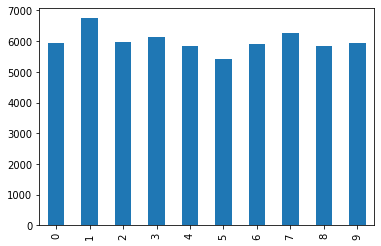

In [11]:
# Plot a bar chart to show class frequencies
raw_data['label'].value_counts().sort_index().plot.bar()

In [ ]:
# maximum, minimum, and mean of numerical features


In [13]:
raw_data.describe()

,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
count,60000.000000,60000.0,60000.0,60000.0,60000.0,60000.0,60000.0,60000.0,60000.0,60000.0,...,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.0000,60000.0,60000.0,60000.0,60000.0
mean,4.453933,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.200433,0.088867,0.045633,0.019283,0.015117,0.0020,0.0,0.0,0.0,0.0
std,2.889270,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,6.042472,3.956189,2.839845,1.686770,1.678283,0.3466,0.0,0.0,0.0,0.0
min,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.0,0.0,0.0,0.0
25%,2.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.0,0.0,0.0,0.0
50%,4.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.0,0.0,0.0,0.0
75%,7.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.0,0.0,0.0,0.0
max,9.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,254.000000,254.000000,253.000000,253.000000,254.000000,62.0000,0.0,0.0,0.0,0.0


In [34]:
# Visualize data as images
ind = 1
input_features = [x for x in raw_data.columns if x != "label"]
data_example = raw_data.loc[ind, input_features]
print(data_example.shape)

(784,)


In [35]:
# ?data_example

In [36]:
# Convert the data example to a numpy array
data_example_array = data_example.values
print(data_example_array.shape)

(784,)


In [37]:
# ?data_example_array

In [38]:
# Transform the array to a 28*28 2D array
data_example_array_transformed = data_example_array.reshape([28, 28])
print(data_example_array_transformed.shape)
print(data_example_array_transformed)

(28, 28)
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0  51 159 253
  159  50   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0  48 238 252 252
  252 237   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0  54 227 253 252 239
  233 252  57   6   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0  10  60 224 252 253 252 202
   84 252 253 122   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0 163 252 2

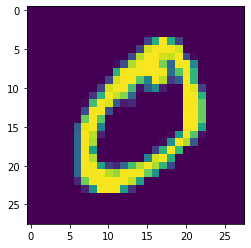

In [39]:
plt.imshow(data_example_array_transformed)

In [40]:
# Write a function to automate the process
def get_image(data, ind):
    # Use data.loc to extract the 784 pixel values
    
    input_features2 = [column for column in data.columns if column != 'label']
    data_example = data.loc[ind, input_features2]
    
    
    # Convert the list to a numpy array
    data_example_numpyArray = data_example.values
    
    # Change the shape to [28, 28]
    data_example_numpyArray_transformed = data_example_numpyArray.reshape([28,28])
    
    # Use imshow() to display the image.    
    plt.imshow(data_example_numpyArray_transformed)
    
#     return data_example_array_transformed

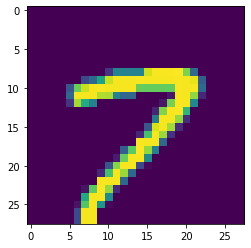

In [42]:
ind = 123
get_image(raw_data, ind)

## III. Build A Classifier

In [43]:
# Create a smaller training set to reduce training time
sample_size = 6000
samples = np.random.choice(raw_data.index, sample_size, replace=False)
mnist_train_small = raw_data.loc[samples]
print(mnist_train_small.shape)

(6000, 785)


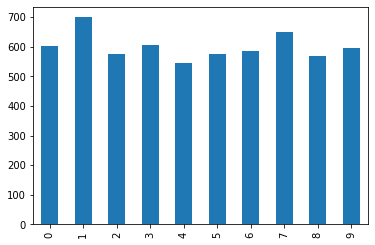

In [44]:
mnist_train_small['label'].value_counts().sort_index().plot.bar()

### 1. k-Nearest-Neighbor Method

In [45]:
print(input_features)

['1x1', '1x2', '1x3', '1x4', '1x5', '1x6', '1x7', '1x8', '1x9', '1x10', '1x11', '1x12', '1x13', '1x14', '1x15', '1x16', '1x17', '1x18', '1x19', '1x20', '1x21', '1x22', '1x23', '1x24', '1x25', '1x26', '1x27', '1x28', '2x1', '2x2', '2x3', '2x4', '2x5', '2x6', '2x7', '2x8', '2x9', '2x10', '2x11', '2x12', '2x13', '2x14', '2x15', '2x16', '2x17', '2x18', '2x19', '2x20', '2x21', '2x22', '2x23', '2x24', '2x25', '2x26', '2x27', '2x28', '3x1', '3x2', '3x3', '3x4', '3x5', '3x6', '3x7', '3x8', '3x9', '3x10', '3x11', '3x12', '3x13', '3x14', '3x15', '3x16', '3x17', '3x18', '3x19', '3x20', '3x21', '3x22', '3x23', '3x24', '3x25', '3x26', '3x27', '3x28', '4x1', '4x2', '4x3', '4x4', '4x5', '4x6', '4x7', '4x8', '4x9', '4x10', '4x11', '4x12', '4x13', '4x14', '4x15', '4x16', '4x17', '4x18', '4x19', '4x20', '4x21', '4x22', '4x23', '4x24', '4x25', '4x26', '4x27', '4x28', '5x1', '5x2', '5x3', '5x4', '5x5', '5x6', '5x7', '5x8', '5x9', '5x10', '5x11', '5x12', '5x13', '5x14', '5x15', '5x16', '5x17', '5x18', '5x1

In [46]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(mnist_train_small[input_features], mnist_train_small['label'])

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

In [47]:
# Load the test data set
mnist_test = pd.read_csv('Data/mnist-in-csv/mnist_test.csv', sep=',')
mnist_test.head()

,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [48]:
# Use the model to make predictions on the test images
predictions = knn.predict(mnist_test[input_features])
print(predictions)

[7 2 1 ... 4 5 6]


In [49]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(predictions, mnist_test['label'])
print(accuracy)

0.9405


### 2. Support Vector Machine

In [ ]:
from sklearn.svm import LinearSVC
model_svm = LinearSVC()
model_svm.fit(mnist_train_small[input_features],mnist_train_small["label"])

In [53]:
# Use the model to make predictions on the test images
predictions = model_svm.predict(mnist_test[input_features])

In [54]:
print(predictions)

[7 2 1 ... 4 5 6]


In [56]:
# Calculate accuracy score
accuracy = accuracy_score(predictions, mnist_test['label'])
print(accuracy)

0.8508


## IV. Performance Evaluation
- Test Accuracy
- Error images
- Confusion matrix

In [57]:
# Find one image with wrong prediction
predictions

array([7, 2, 1, ..., 4, 5, 6], dtype=int64)

In [58]:
mnist_test['label']

0       7
1       2
2       1
3       0
4       4
       ..
9995    2
9996    3
9997    4
9998    5
9999    6
Name: label, Length: 10000, dtype: int64

In [59]:
# Append predictions to mnist_test
mnist_test['SVM'] = predictions
mnist_test.head()

,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,...,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28,SVM
0,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,7
1,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,4


In [61]:
# Create a boolean column that compares label with SVM prediction
mnist_test['Correct?'] = (mnist_test['label'] == mnist_test['SVM'])
mnist_test.head()

,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,...,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28,SVM,Correct?
0,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,7,True
1,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,2,True
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,True
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,True
4,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,4,True


In [65]:
# Extract rows that are mis-classified
misclassified = mnist_test[~mnist_test['Correct?']]
misclassified.head()

,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,...,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28,SVM,Correct?
7,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,4,False
8,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,6,False
18,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,8,False
33,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,6,False
52,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,4,False


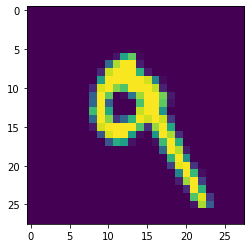

In [67]:
# Show one image
raw_test = misclassified[input_features]
ind = get_image(raw_test, 7)

In [ ]:
# Confusion matrix
from sklearn.metrics import confusion_matrix
mat = confusion_matrix(test_predictions, mnist_test['label'])
print(mat)

In [ ]:
# Visualize the confusion matrix


[Wheel Decide](https://wheeldecide.com/index.php?c1=Mohammed&c2=Alvin&c3=Wyahid&c4=Josue+&c5=Vincent&c6=Jose+A&c7=Immanuel&c8=Xujuan&c9=Rene&c10=Rishi&c11=Andy+D&c12=Miguel&c13=Frank&c14=Daniel&c15=Kevin&c16=Omar&c17=Mohit+U&c18=Dilan&c19=Alix+F&c20=Yafira&c21=Ba&c22=Jennifer&c23=Joshua+M&c24=Francis&c25=David&c26=Jose&c27=Jordan+B&c28=Guevara&c29=Shiva&c30=Gilberto+M&c31=Ygor+J+&c32=Ayaz&c33=Quan&time=5)